# Dataset과 DataLoader

## 데이터셋 불러오기

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

## 데이터셋을 순회하고 시각화하기

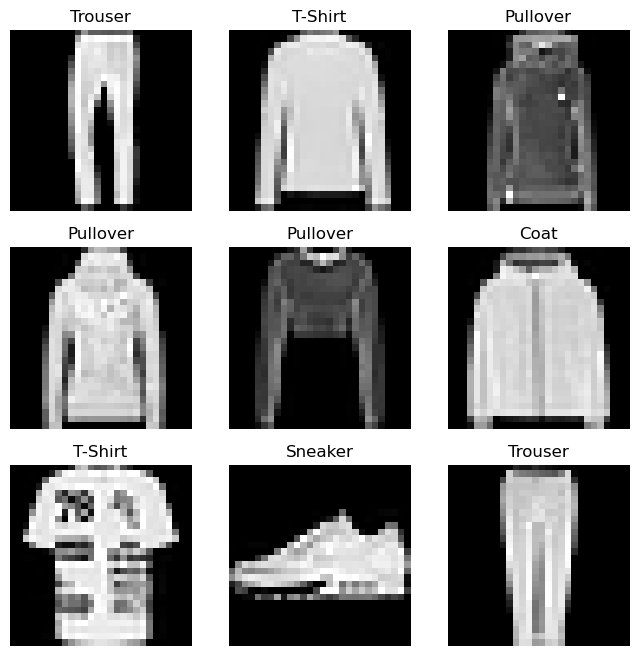

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 파일에서 사용자 정의 데이터셋 만들기

In [4]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_tranform=None):
        self.img_labels = pd.read.csv(annotations_file, names = ['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_tranform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.target_transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### **__init__**
**__init__** 함수는 Dataset 객체가 생성될 때 한번만 실행된다. 

여기서는 이미지와 주석파일이 포함된 디렉토리와 두가지 변형을 초기화 한다.

In [8]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transfor = target_transform

## **__len__**
**__len__** 함수는 데이터셋의 샘플 개수를 반환한다.

In [9]:
def __len__(self):
    return len(self.img_labels)

## **__getitem__**
**__getitem__** 함수는 주어진 인덱스 **idx**에 해당하는 샘플을 데이터셋에서 불러오고 반환한다.

인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고 **read_image**를 사용하여 이미지를 텐서로 변환한다.

In [10]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_label.iloc[idx, 1]
    if self.transform:
        image = self.transform(label)
    sample = {"image": image, "label": label}
    return sample

## DataLoader로 학습용 데이터 준비하기

In [11]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

## DataLoader를 통해 순회하기

Feature batch shape: torch.Size([64, 1, 28, 28])
Label batch shape: torch.Size([64])


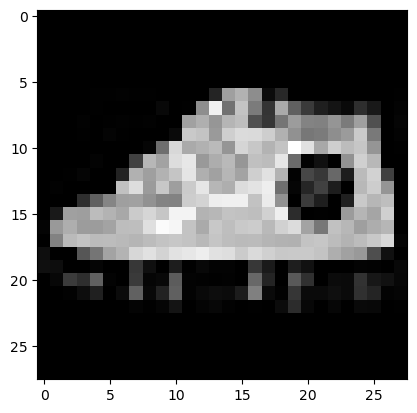

label: 7


In [14]:
# 이미지와 정답을 표기한다.
train_features, train_label = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Label batch shape: {train_label.size()}")
img = train_features[0].squeeze()
label = train_label[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"label: {label}")